In [1]:
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_raw_O_list = glob("./Documents/fcdss15/OX/train_raw/O/*")

In [3]:
train_raw_O_list

['./Documents/fcdss15/OX/train_raw/O/IMG_0799.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0772.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0766.JPG',
 './Documents/fcdss15/OX/train_raw/O/PNG 이미지(37).png',
 './Documents/fcdss15/OX/train_raw/O/o16.png',
 './Documents/fcdss15/OX/train_raw/O/PNG 이미지(21).png',
 './Documents/fcdss15/OX/train_raw/O/IMG_1121.JPG',
 './Documents/fcdss15/OX/train_raw/O/PNG 이미지(8).png',
 './Documents/fcdss15/OX/train_raw/O/o17.png',
 './Documents/fcdss15/OX/train_raw/O/IMG_0767.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0773.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0798.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0765.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0771.JPG',
 './Documents/fcdss15/OX/train_raw/O/IMG_0759.JPG',
 './Documents/fcdss15/OX/train_raw/O/o29.png',
 './Documents/fcdss15/OX/train_raw/O/o15.png',
 './Documents/fcdss15/OX/train_raw/O/IMG_1123.JPG',
 './Documents/fcdss15/OX/train_raw/O/PNG 이미지(17).png',
 './Docum

In [4]:
from skimage.transform import rescale, resize
from skimage import color
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
plt.style.use('default')

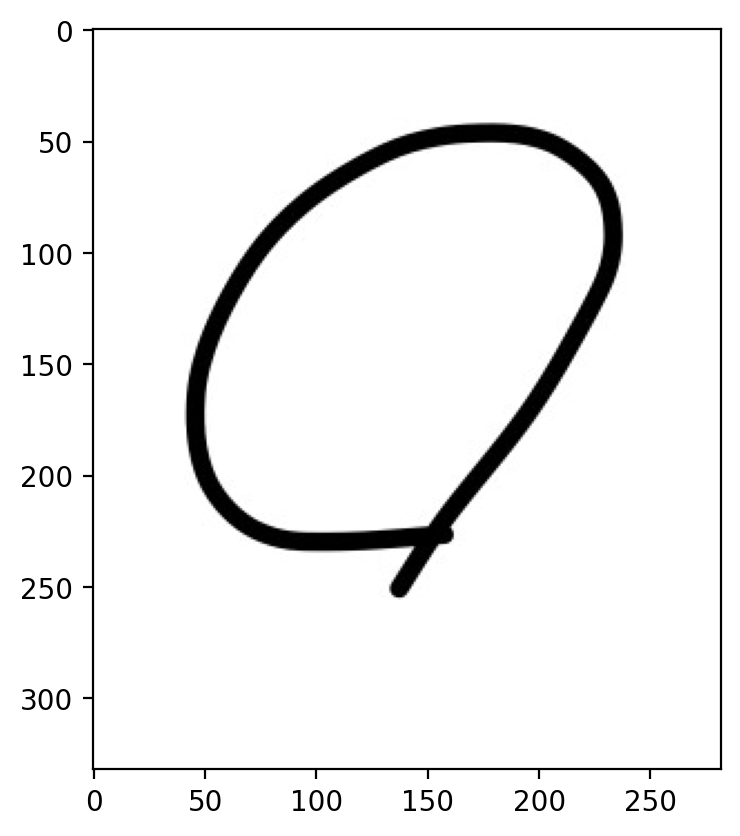

In [5]:
image = imread(train_raw_O_list[0])
image = color.rgb2gray(image)
plt.imshow(image, cmap='gray');

(28, 28)


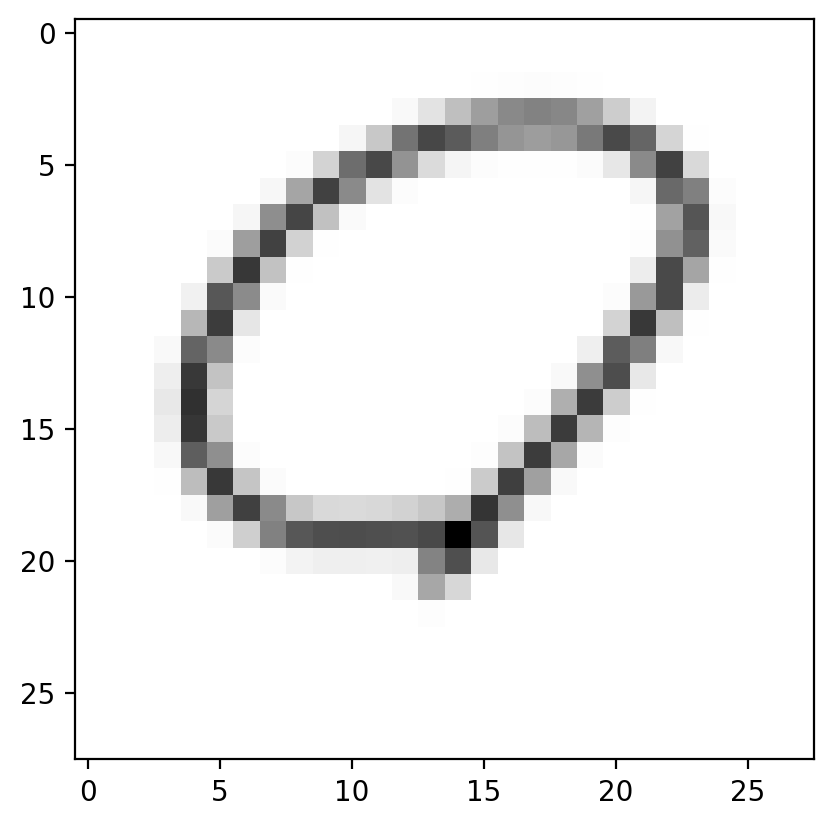

In [6]:
img_resized = resize(image, (28,28))
print(img_resized.shape)
plt.imshow(img_resized, cmap='gray');

In [7]:
import numpy as np

imsave('./Documents/fcdss15/OX/tmp.png', np.round(img_resized*255).astype(np.uint8))

(28, 28)


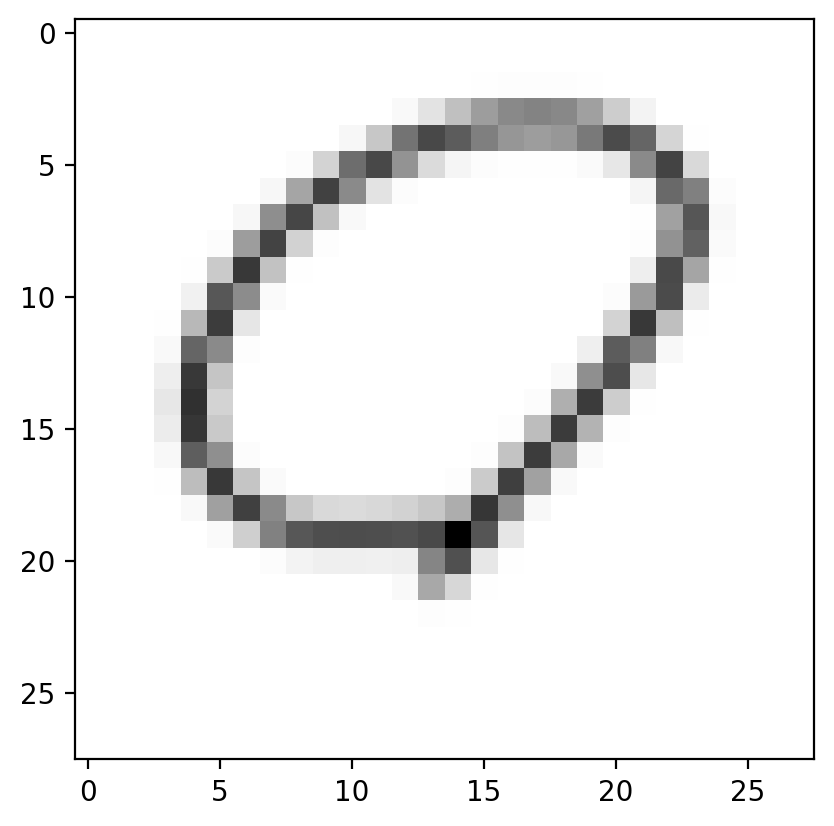

In [8]:
tmp = imread('./Documents/fcdss15/OX/tmp.png')
print(tmp.shape)
plt.imshow(tmp, cmap='gray');

In [9]:
train_raw_O_list[0].split('/')[-1][:-4]

'IMG_0799'

In [10]:
def img_resize(img):
    img = color.rgb2gray(img)
    return resize(img, (28,28))

### train_O

In [11]:
from tqdm.notebook import tqdm

def convert_train_O():
    train_raw_O_list = glob("./Documents/fcdss15/OX/train_raw/O/*")
    for each in tqdm(train_raw_O_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = "./Documents/fcdss15/OX/train/O/" + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_train_O()

### train_X

In [12]:
from tqdm.notebook import tqdm

def convert_train_X():
    train_raw_X_list = glob("./Documents/fcdss15/OX/train_raw/X/*")
    for each in tqdm(train_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = "./Documents/fcdss15/OX/train/X/" + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))
        
convert_train_X()

### test_O

In [13]:
def convert_test_O():
    test_raw_O_list = glob("./Documents/fcdss15/OX/test_raw/O/*")
    for each in tqdm(test_raw_O_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = "./Documents/fcdss15/OX/test/O/" + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_test_O()

### test_X

In [14]:
def convert_test_X():
    test_raw_X_list = glob("./Documents/fcdss15/OX/test_raw/X/*")
    for each in tqdm(test_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = "./Documents/fcdss15/OX/test/X/" + each.split('/')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_test_X()

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras

np.random.seed(13)

In [16]:
keras.__version__

'2.4.3'

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './Documents/fcdss15/OX/train',
    target_size=(28,28),
    batch_size=3,
    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './Documents/fcdss15/OX/test',
    target_size=(28,28),
    batch_size=3,
    class_mode = 'categorical')

Found 281 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 1,199,426
Trainable params: 1,199,426
Non-trainable params: 0
______________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [21]:
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 53ms/step - loss: 1.0125 - accuracy: 0.4830 - val_loss: 0.6354 - val_accuracy: 0.5333
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 0.4863 - accuracy: 0.7637 - val_loss: 0.2156 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.2107 - accuracy: 0.9363 - val_loss: 0.1004 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1519 - accuracy: 0.9605 - val_loss: 0.0880 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0541 - accuracy: 0.9719 - val_loss: 0.4006 - val_accuracy: 0.8667
Epoch 6/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0710 - accuracy: 0.9763 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.9677 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 8/50
15

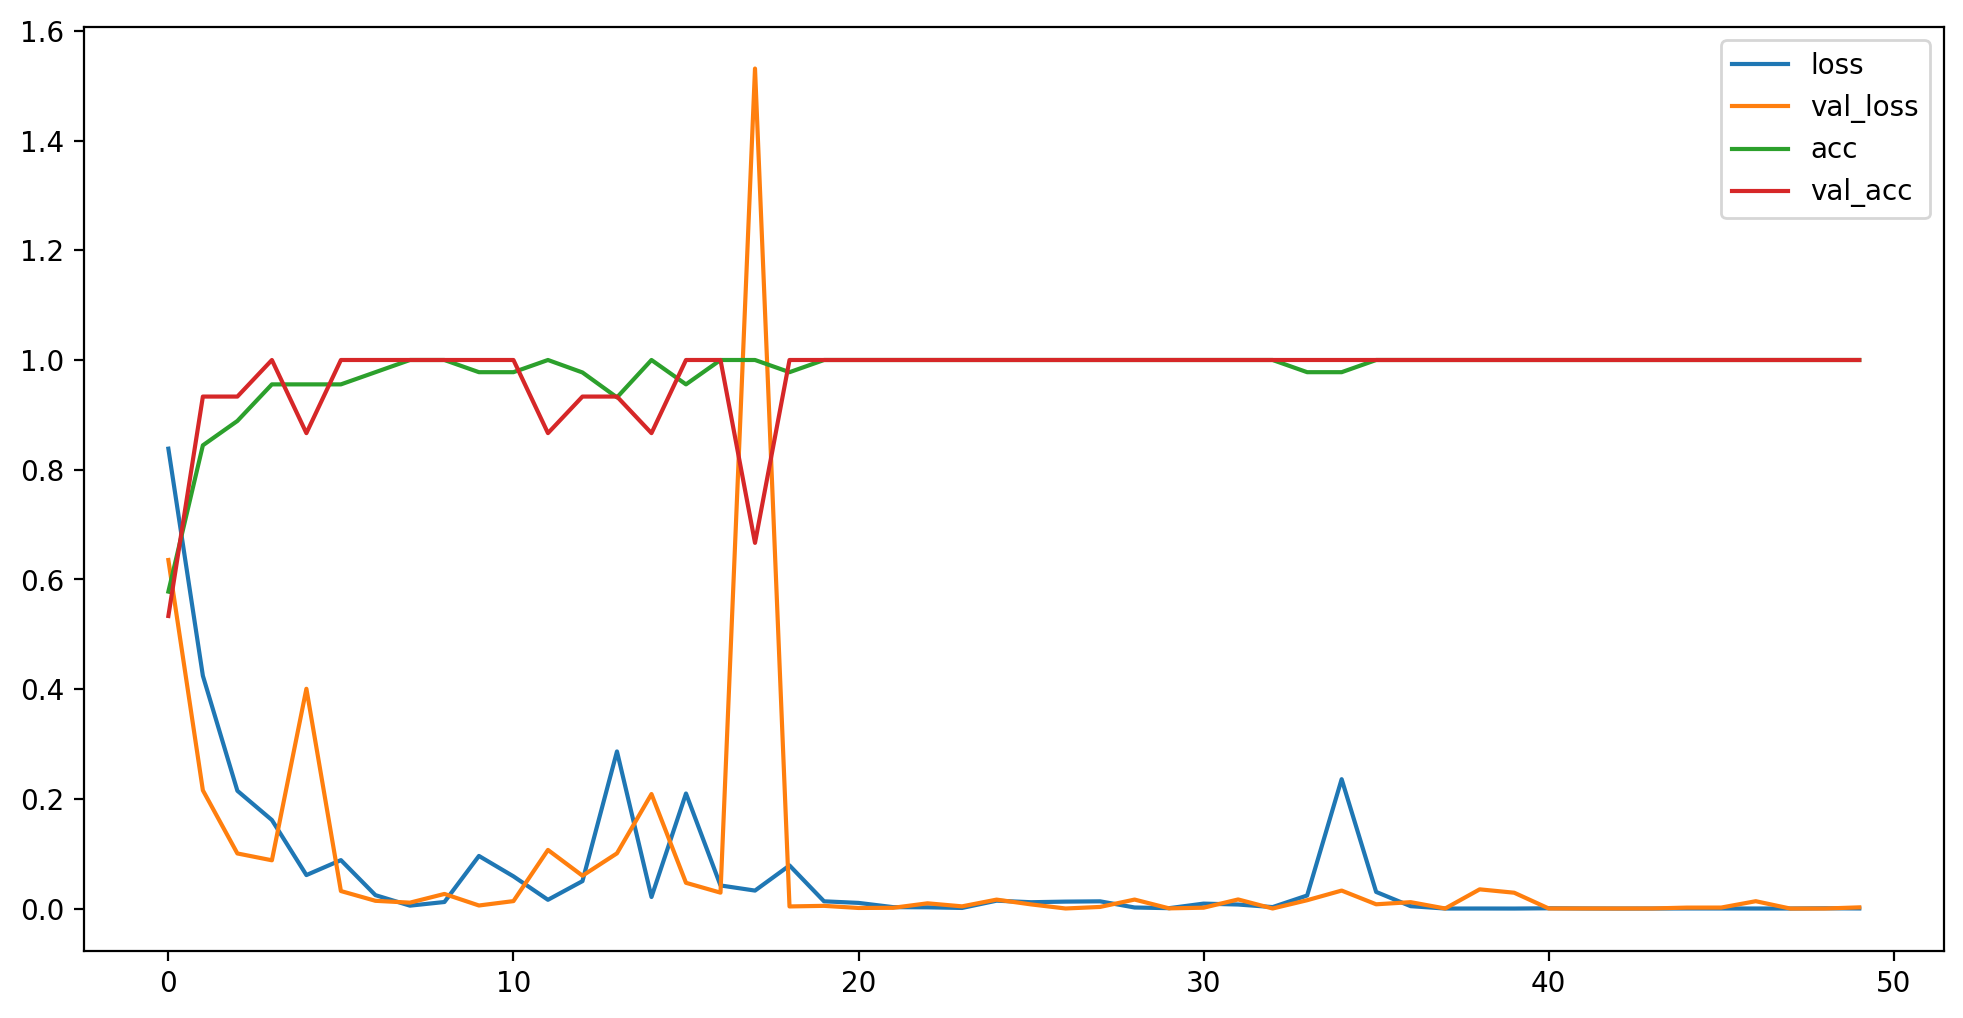

In [22]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [23]:
scores = model.evaluate(
            test_generator,
            steps=5)

print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 5.1642e-04 - accuracy: 1.0000
accuracy: 100.00%


In [24]:
model.predict(test_generator)

array([[8.70978401e-09, 1.00000000e+00],
       [1.81266819e-06, 9.99998212e-01],
       [1.31000452e-05, 9.99986887e-01],
       [9.99900937e-01, 9.90314002e-05],
       [1.00000000e+00, 3.99507892e-11],
       [1.93865233e-07, 9.99999762e-01],
       [9.30160116e-11, 1.00000000e+00],
       [9.99989033e-01, 1.09442999e-05],
       [9.99762714e-01, 2.37333690e-04],
       [9.99946356e-01, 5.36599291e-05],
       [9.99985099e-01, 1.48680710e-05],
       [8.94802088e-06, 9.99991059e-01],
       [9.99854803e-01, 1.45195794e-04],
       [6.61057141e-03, 9.93389368e-01],
       [9.99937057e-01, 6.28878188e-05],
       [1.00000000e+00, 2.75541368e-10],
       [9.99984384e-01, 1.55977996e-05],
       [9.99999642e-01, 3.24784821e-07],
       [9.99907255e-01, 9.27243600e-05],
       [9.99989986e-01, 9.98847554e-06],
       [1.71785572e-07, 9.99999881e-01],
       [1.67362106e-08, 1.00000000e+00],
       [1.07312285e-13, 1.00000000e+00],
       [1.61863203e-10, 1.00000000e+00],
       [3.631992

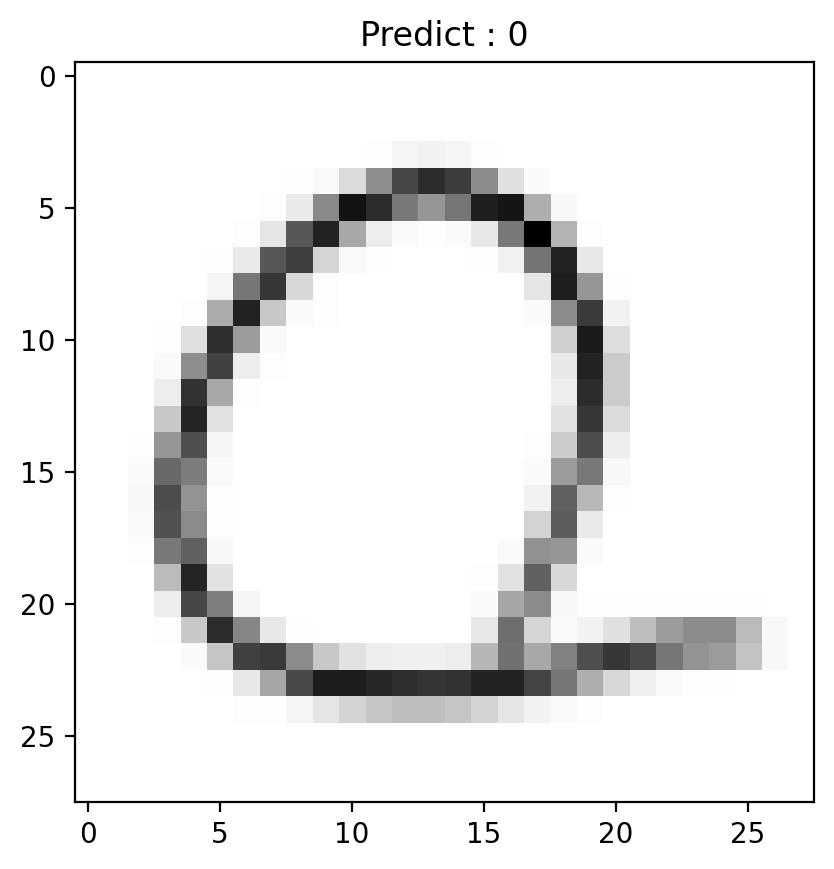

In [25]:
n = 1

def show_prediction_result(n):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
    title = 'Predict : ' + str(np.argmax(pred))
    plt.imshow(img/255., cmap='gray')
    plt.title(title)
    plt.show()
    
show_prediction_result(n)

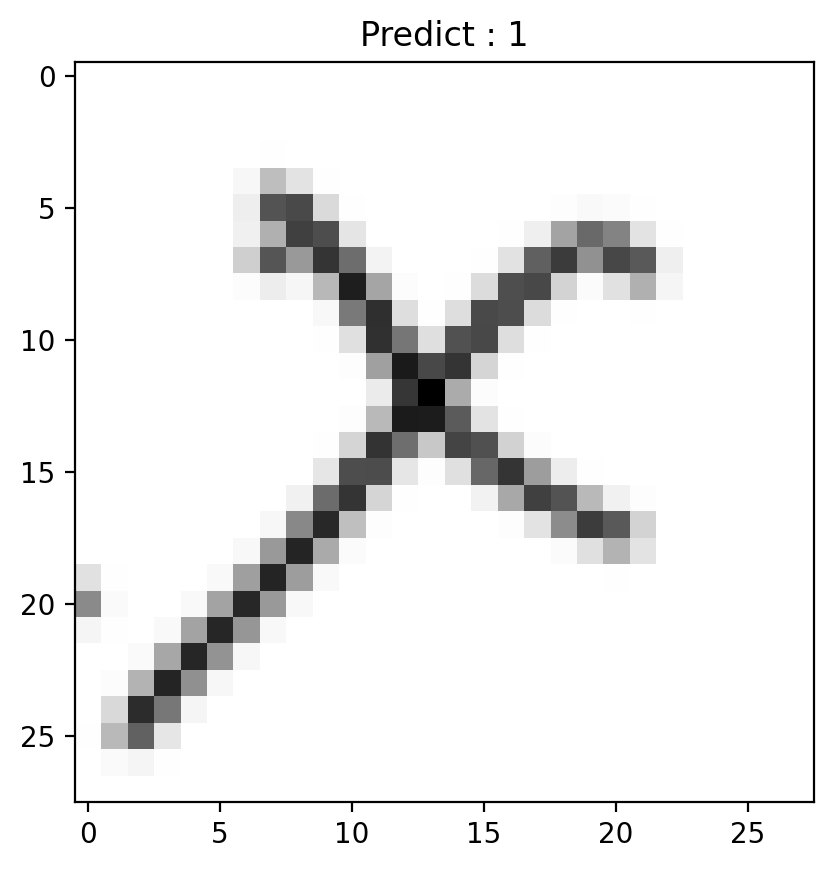

In [26]:
show_prediction_result(40)